In [138]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [139]:
fetus_full = pd.read_csv("Data/fetus-cleaned.csv")
mother_full = pd.read_csv("Data/mother-cleaned.csv")

# Dropping resorp mice for some eda as well as one particular observation with missing data (unknown why)
fetus = fetus_full[fetus_full['Fetus_genotype'] != 3]
fetus = fetus.dropna()

In [140]:
fetus.shape[0]

115

## Assessing distributions of variables

First, we check to see if the sexes of baby mice are split evenly

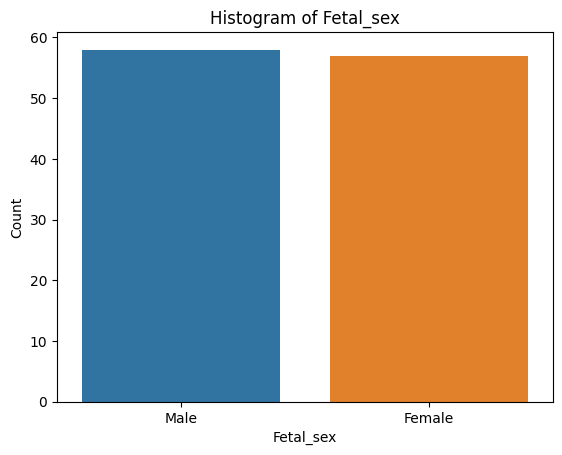

0.4956521739130435


In [141]:
# Checking for a roughly 50/50 split of sex. Important that data is balanced
sns.countplot(data=fetus, x='Fetal_sex')

plt.xlabel('Fetal_sex')
plt.ylabel('Count')
plt.title('Histogram of Fetal_sex')

updated_labels = ['Male', 'Female']
plt.gca().set_xticklabels(updated_labels)

plt.show()

print(np.mean(fetus["isFemale"]))

Looks good. ~50% of babies are female, so no worries about sex breakdown.

Now, we check the distribution of placenta mass, fetal mass, and fetal/placenta ratio

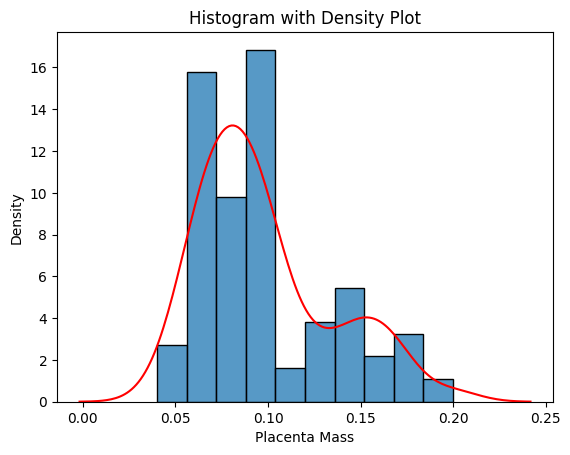

Shapiro-Wilkes p-val: 3.798523380282859e-07


In [142]:
# Create a histogram using seaborn
sns.histplot(data=fetus, x='Placenta_mass', kde=False, stat='density', bins=10)

# Overlay a density plot
sns.kdeplot(data=fetus, x='Placenta_mass', color='red')

# Set labels and title
plt.xlabel('Placenta Mass')
plt.ylabel('Density')
plt.title('Histogram with Density Plot')

# Display the plot
plt.show()

print("Shapiro-Wilkes p-val: " + str(stats.shapiro(fetus['Placenta_mass'])[1]))

Not normally distributed (right-skew)

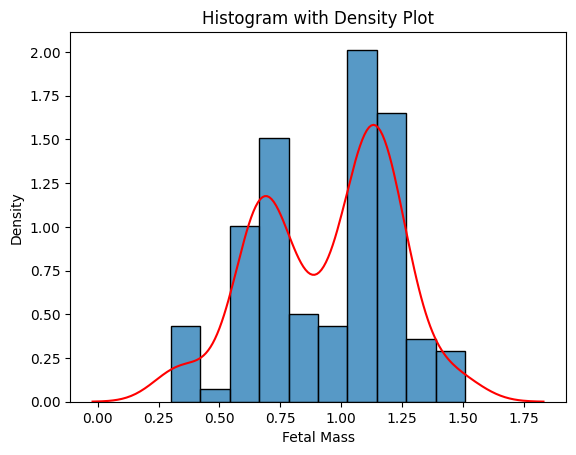

Shapiro-Wilkes p-val: 5.660957322106697e-05


In [143]:
# Create a histogram using seaborn
sns.histplot(data=fetus, x='Fetal_mass', kde=False, stat='density', bins=10)

# Overlay a density plot
sns.kdeplot(data=fetus, x='Fetal_mass', color='red')

# Set labels and title
plt.xlabel('Fetal Mass')
plt.ylabel('Density')
plt.title('Histogram with Density Plot')

# Display the plot
plt.show()

print("Shapiro-Wilkes p-val: " + str(stats.shapiro(fetus['Fetal_mass'])[1]))

Not normally distributed (bimodal)

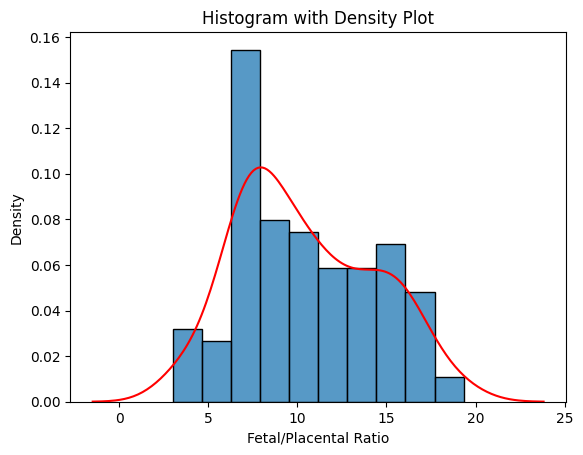

Shapiro-Wilkes p-val: 0.003708906238898635


In [144]:
# Create a histogram using seaborn
sns.histplot(data=fetus, x='Fetal_placental ratio', kde=False, stat='density', bins=10)

# Overlay a density plot
sns.kdeplot(data=fetus, x='Fetal_placental ratio', color='red')

# Set labels and title
plt.xlabel('Fetal/Placental Ratio')
plt.ylabel('Density')
plt.title('Histogram with Density Plot')

# Display the plot
plt.show()

print("Shapiro-Wilkes p-val: " + str(stats.shapiro(fetus['Fetal_placental ratio'])[1]))

Not normally distributed (right-skew)

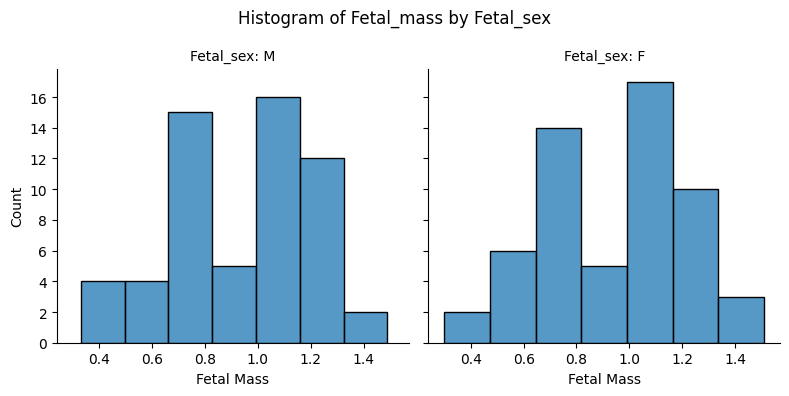

In [145]:
# Create a FacetGrid with histograms wrapped by "Fetal_sex"
g = sns.FacetGrid(data=fetus, col='Fetal_sex', height=4)

# Map histograms to each subplot in the FacetGrid
g.map(sns.histplot, 'Fetal_mass')

# Set labels and title
g.set_axis_labels('Fetal Mass', 'Count')
g.set_titles('Fetal_sex: {col_name}')
plt.suptitle('Histogram of Fetal_mass by Fetal_sex')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [146]:
grouped = fetus.groupby('Fetal_sex')

# Perform Shapiro-Wilk test for normality on 'Fetal_mass' for each group
for group_name, group_data in grouped:
    shapiro_test = stats.shapiro(group_data['Fetal_mass'])
    test_statistic, p_value = shapiro_test
    print(f"Group: {group_name}")
    print("Shapiro-Wilk Test Statistic:", test_statistic)
    print("p-value:", p_value)
    print("Data Size: " + str(group_data.shape[0]))
    print()

Group: F
Shapiro-Wilk Test Statistic: 0.9370275735855103
p-value: 0.005288358777761459
Data Size: 57

Group: M
Shapiro-Wilk Test Statistic: 0.9289374947547913
p-value: 0.002194078639149666
Data Size: 58



## Assessing Ind/Dep Variable Relationships

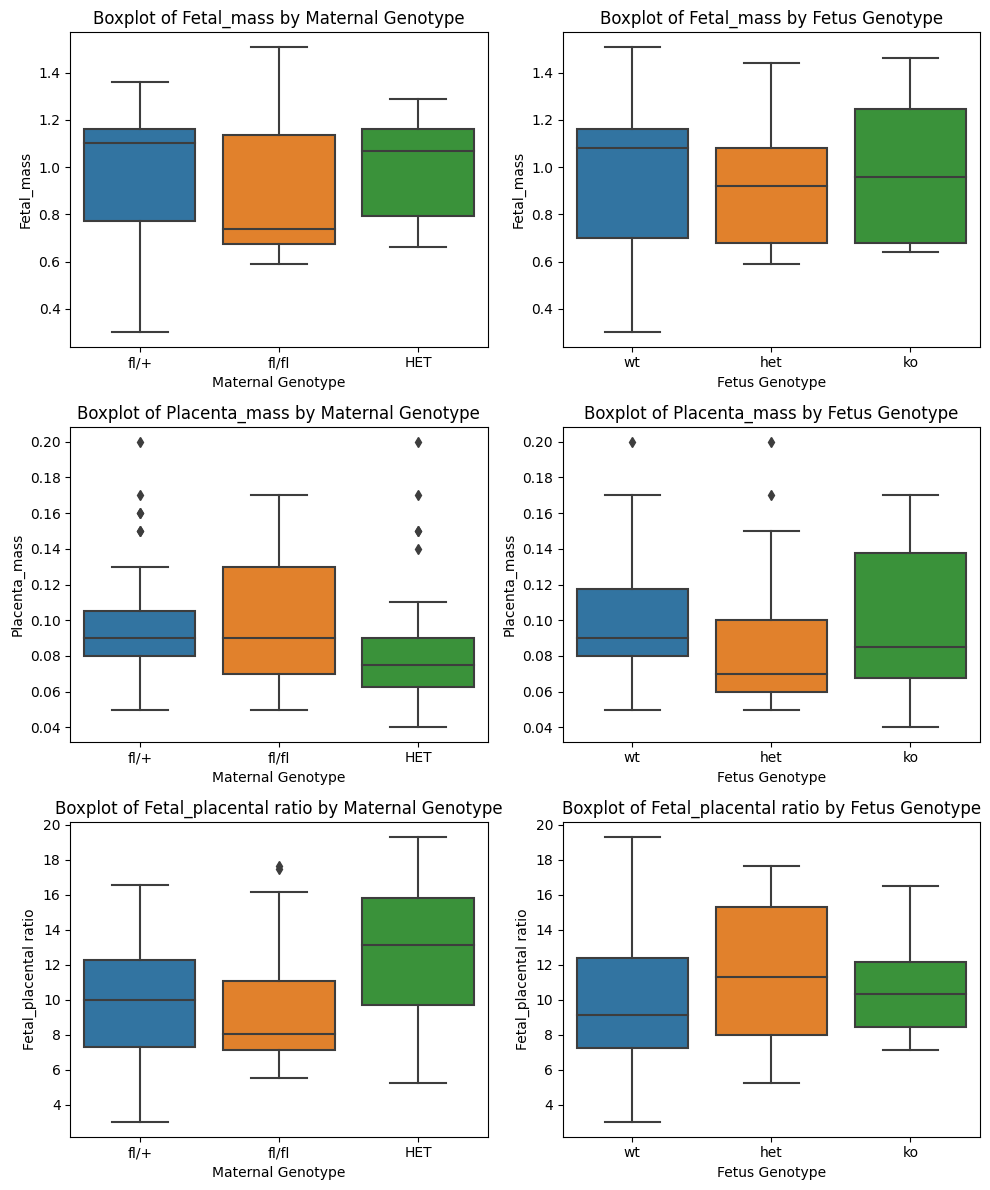

In [147]:
fig, axes = plt.subplots(3, 2, figsize=(10,12))

# Define the independent variables and their corresponding subplot indices
independent_vars = ['Fetal_mass', 'Placenta_mass', 'Fetal_placental ratio']
subplot_indices = [(0, 0), (1, 0), (2, 0)]

# Iterate over the independent variables
for i, var in enumerate(independent_vars):
    # Plot for Maternal_genotype
    sns.boxplot(x='Maternal_genotype', y=var, data=fetus, ax=axes[subplot_indices[i]])

    axes[subplot_indices[i]].set_xlabel('Maternal Genotype')
    axes[subplot_indices[i]].set_ylabel(var)
    axes[subplot_indices[i]].set_title(f'Boxplot of {var} by Maternal Genotype')

    # Plot for Fetus_genotype
    sns.boxplot(x='Fetus_genotype', y=var, data=fetus, ax=axes[subplot_indices[i][0], 1])

    axes[subplot_indices[i][0], 1].set_xlabel('Fetus Genotype')
    axes[subplot_indices[i][0], 1].set_ylabel(var)
    axes[subplot_indices[i][0], 1].set_title(f'Boxplot of {var} by Fetus Genotype')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

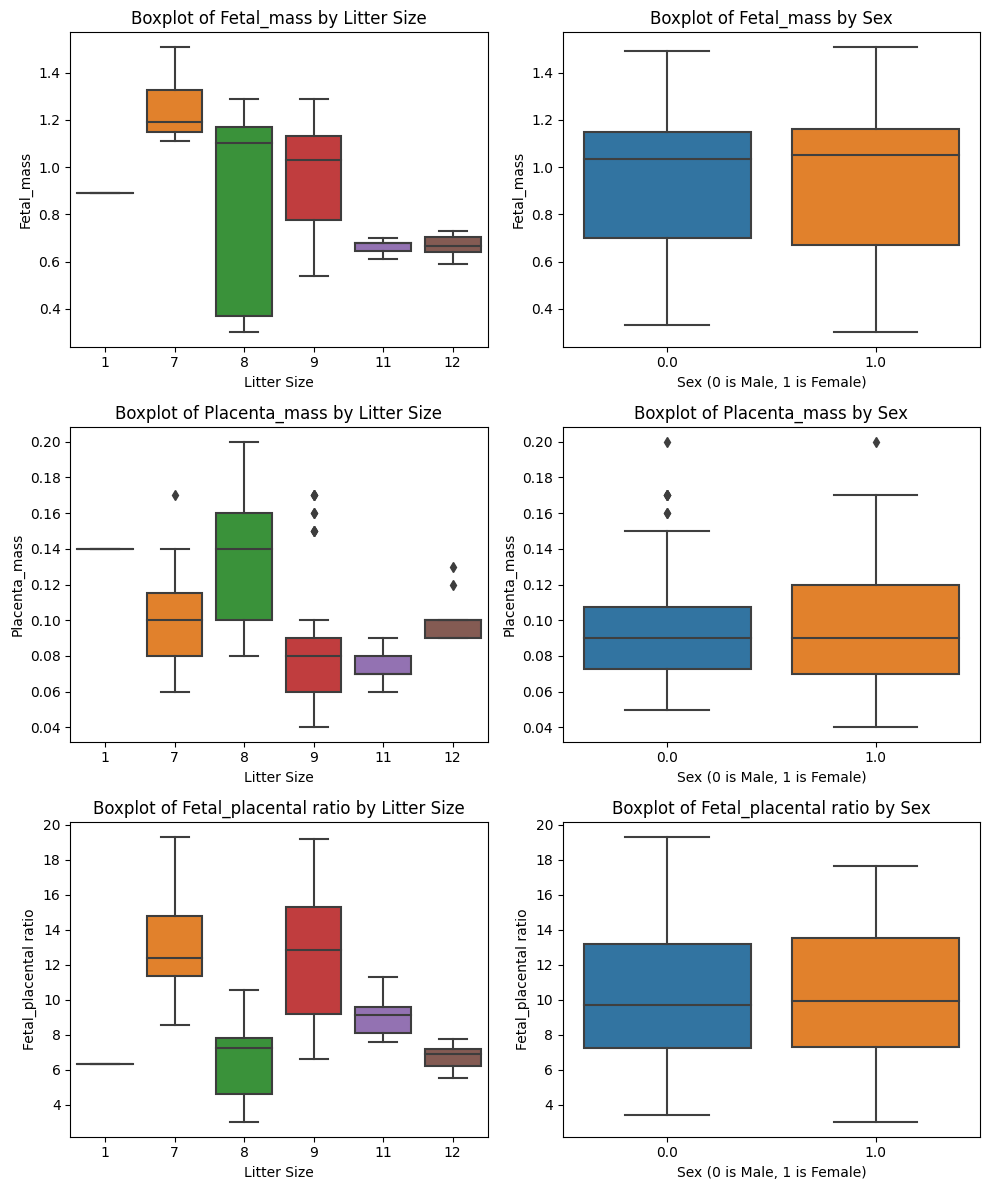

In [148]:
fig, axes = plt.subplots(3, 2, figsize=(10,12))

# Define the independent variables and their corresponding subplot indices
independent_vars = ['Fetal_mass', 'Placenta_mass', 'Fetal_placental ratio']
subplot_indices = [(0, 0), (1, 0), (2, 0)]

# Iterate over the independent variables
for i, var in enumerate(independent_vars):
    # Plot for Maternal_genotype
    sns.boxplot(x='Litter_size', y=var, data=fetus, ax=axes[subplot_indices[i]])

    axes[subplot_indices[i]].set_xlabel('Litter Size')
    axes[subplot_indices[i]].set_ylabel(var)
    axes[subplot_indices[i]].set_title(f'Boxplot of {var} by Litter Size')

    # Plot for Fetus_genotype
    sns.boxplot(x='isFemale', y=var, data=fetus, ax=axes[subplot_indices[i][0], 1])

    axes[subplot_indices[i][0], 1].set_xlabel('Sex (0 is Male, 1 is Female)')
    axes[subplot_indices[i][0], 1].set_ylabel(var)
    axes[subplot_indices[i][0], 1].set_title(f'Boxplot of {var} by Sex')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

Does not help to split by sex. More is going on here than previously thought. I don't think we have enough data to directly explain the bimodal nature of the response variables.

What is very likely a possibility is that there's random effects between mother mice. Perhaps if we could match mother mice to child mice, some of this mixture could be explained. There's no linking variable, so this might be tough (but I think we can potentially link via litter_size and absorptions?)

A mixed effects model will be important to try and find the true underlying $\theta$ value so that 

$Y_{i,j} = \theta^T \mathbf{x}_{i,j} + \gamma^T \mathbf{x}_{i,j} + \epsilon_{i,j}$

Where $\theta$ is the fixed effect, $\gamma$ are the random effects, and $\epsilon_{i,j} \sim N(0, \sigma^2)$. Sharing the data using heirarchical models allows us to get a significantly stronger estimate of $\theta$ to assess our hypotheses.